In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
file_dist_test = open('../log/100k_500_5e-4_32x32/LOG_vec_inter_dist_test.txt', 'r')
file_no_dist_test = open('../log/100k_500_5e-4_32x32/LOG_vec_inter_test.txt', 'r')

In [76]:
def read_runtime_opt_time_from_line(line):
    words = line.split()
    runtime = words[2]
    opt_time = words[4]
    
    if words[-1] != "enable" and words[-1] != "DIST":
        return float(opt_time), float(opt_time)
    
    return float(runtime), float(opt_time)

In [77]:
runtimes1 = []
runtimes2 = []
opt_times = []

for line in file_dist_test.readlines():
    runtime, opt_time = read_runtime_opt_time_from_line(line)
    runtimes1.append(runtime)
    opt_times.append(opt_time)

for line in file_no_dist_test.readlines():
    runtime, _ = read_runtime_opt_time_from_line(line)
    runtimes2.append(runtime) 

In [78]:
rewards1 = []
rewards2 = []

for i in range(len(opt_times)):
    rewards1.append((opt_times[i] - runtimes1[i]) / opt_times[i])
    rewards2.append((opt_times[i] - runtimes2[i]) / opt_times[i])

In [79]:
data = {'test program': [], 'optimization': [], 'reward': []}
df = pd.DataFrame(data)

for i in range(len(opt_times)):
    if rewards1[i] == 0 or rewards2[i] == 0:
        continue
    df.loc[len(df.index)] = [i, 'vectorize + distribute', rewards1[i]]
    df.loc[len(df.index)] = [i, 'vectorize', rewards2[i]]

df

,test program,optimization,reward
0,4,vectorize + distribute,-0.136364
1,4,vectorize,-0.022727
2,5,vectorize + distribute,0.042105
3,5,vectorize,0.059649
4,7,vectorize + distribute,-0.029885
...,...,...,...
73,96,vectorize,0.145374
74,97,vectorize + distribute,-0.023256
75,97,vectorize,-0.077519
76,98,vectorize + distribute,0.021739


<AxesSubplot:xlabel='test program', ylabel='reward'>

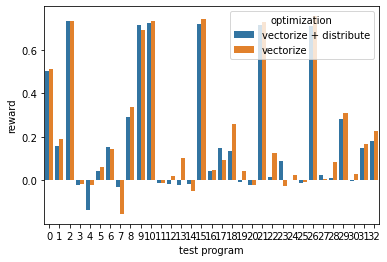

In [44]:
sns.barplot(data=df, x='test program', y='reward', hue='optimization')

In [80]:
count = 0
for i in range(len(opt_times)):
    if rewards1[i] > rewards2[i]:
        count += 1
count

21